In [50]:
import os
from pathlib import Path

import matplotlib.pyplot as plt
from skimage.io import imread

import tensorflow as tf


processing: /home/sam/howest/howest-dl/sessie_02/opdracht/Face_Recognition/15_Classes/Amanda Crew35.jpg
(299, 299, 3)


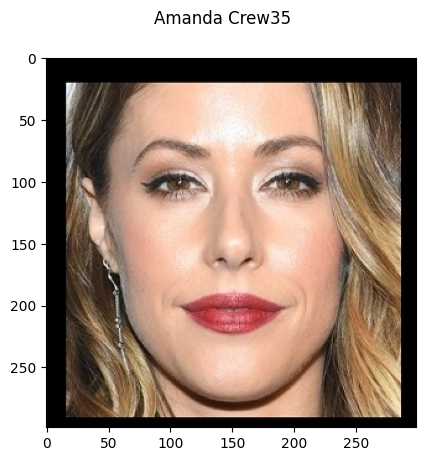

Amanda Crew35
processing: /home/sam/howest/howest-dl/sessie_02/opdracht/Face_Recognition/15_Classes/anne hathaway127.jpg
(299, 299, 3)


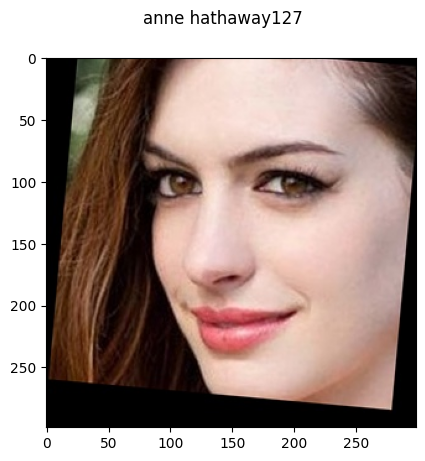

anne hathaway127
processing: /home/sam/howest/howest-dl/sessie_02/opdracht/Face_Recognition/15_Classes/Brenton Thwaites102.jpg
(299, 299, 3)


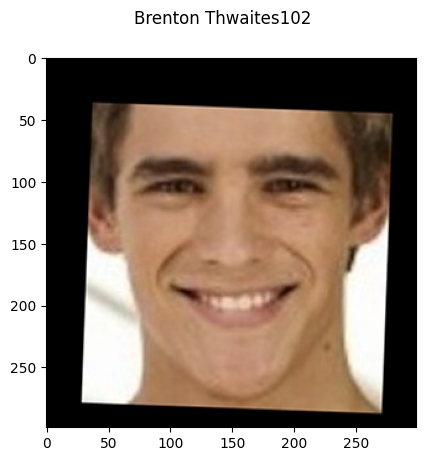

Brenton Thwaites102
processing: Tensor("args_0:0", shape=(), dtype=string)


TypeError: in user code:

    File "/tmp/ipykernel_2427175/1479266732.py", line 6, in process_face_file  *
        f, ext = os.path.splitext(file_path)
    File "<frozen posixpath>", line 118, in splitext  **
        

    TypeError: expected str, bytes or os.PathLike object, not SymbolicTensor


In [53]:
DATA_DIR = Path("/home/sam/howest/howest-dl/sessie_02/opdracht/Face_Recognition/15_Classes")
VALID_IMAGE_FILE_EXTENSIONS = [".jpg",".gif",".png"]
def process_face_file(file_path):
    print(f"processing: {file_path}")
    file_name = file_path.numpy().decode('utf-8')
    parts = tf.strings.split(file_path, os.sep)
    f, ext = os.path.splitext(file_path)
    p, label = os.path.split(f)
    if ext not in VALID_IMAGE_FILE_EXTENSIONS:  # the extension
        return
    raw_image_data = tf.io.read_file(file_path)
    image_data = imread(file_path)
    print(image_data.shape)

    return image_data, label

list_ds = tf.data.Dataset.list_files(f"{DATA_DIR}/*")
for f in list_ds.take(3):
    file_name = f.numpy().decode('utf-8')
    img, label = process_face_file(file_name)
    plt.imshow(img)
    plt.suptitle(label)
    plt.show()
    print(label)

labeled_ds = list_ds.map(process_face_file)

for x in labeled_ds.take(3):
    print(x)


    # i = 5
# for f in os.listdir(DATA_DIR):
#     if i>= 0:
#         print(f)
#         print(os.path.splitext(f)[1])
#         print(os.path.splitext(f)[0])
#     i = i-1

In [48]:
os.path.splitext(next(list_ds).numpy())

TypeError: '_ShuffleDataset' object is not an iterator

In [10]:
os.sep

'/'

In [ ]:
def process_path(file_path):
    valid_images = [".jpg",".gif",".png"]
    for f in os.listdir(path)[:]:
        ext = os.path.splitext(f)[1]
        if ext.lower() not in valid_images:
            continue
        im = imread(os.path.join(path,f)) 
        im = transform.resize(im,(image_size,image_size),mode='constant',anti_aliasing=True)
        faces.append(im)
        #s = re.sub('[0-9]\w+', '', f)
        s = os.path.splitext(f)[0]
        s = ''.join([i for i in s if not i.isdigit()])
        s = s.replace("_", "")
        labels.append(s)